<a href="https://colab.research.google.com/github/kiiran7781/LGMVIP-DataScience-Kiran-K/blob/main/Intermediate%20level%20tasks/Prediction_using_decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science Intern at Let's Grow More LGMVIP -Aug**

## **Intermediate Level Task**

## **Prediction using decision tree algorithm**

## **K Kiran**

**Importing** Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.7 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


Importing the dataset

In [ ]:

df=pd.read_csv('/content/iris_data.csv',names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking null values

In [ ]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

Checking and dropping duplicates

In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(147, 5)

In [ ]:
df.nunique()

SepalLength    35
SepalWidth     23
PetalLength    43
PetalWidth     22
Species         3
dtype: int64

In [ ]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

#Data visualisation

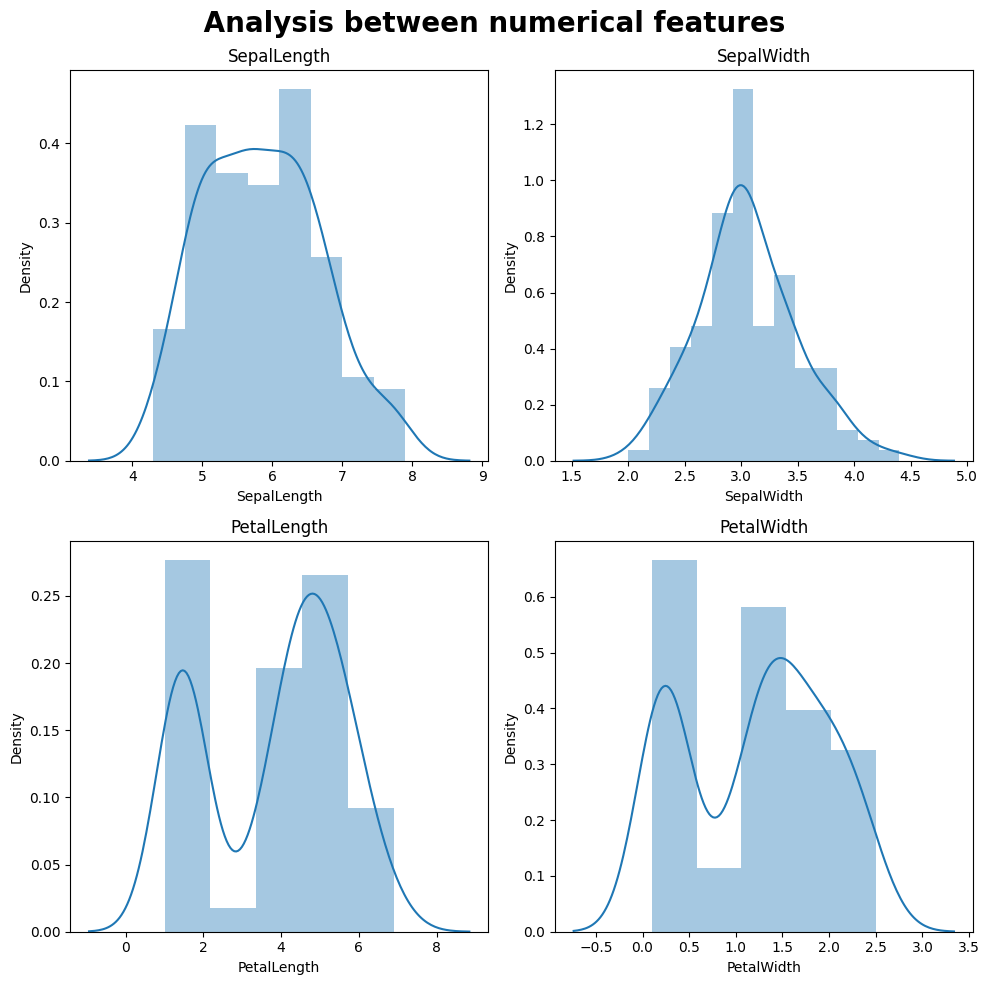

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle(' Analysis between numerical features ', fontsize=20, fontweight='bold')
for i in range(0,len(df.columns)-1):
   plt.subplot(2,2,i+1)
   sns.distplot(df[df.columns[i]])
   plt.title(df.columns[i])
   plt.tight_layout()

Sepal length and Sepal width have normal distribution

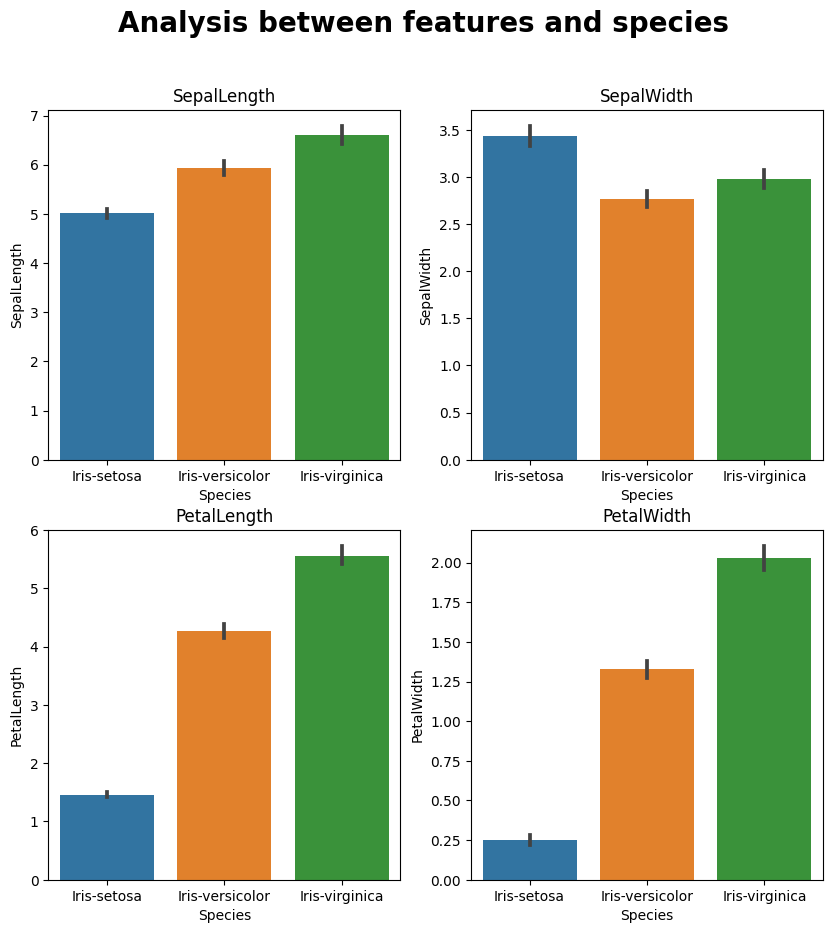

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Analysis between features and species',fontsize=20,fontweight='bold')
for i in range(0,len(df.columns)-1):
    plt.subplot(2,2,i+1)
    sns.barplot(x=df['Species'],y=df[df.columns[i]])
    plt.title(df.columns[i])

Iris-virginica has higher Sepal length comparing to other species

Iris-sentosa has higher Sepal width comparing to other species

Iris-virginica has higher petal length comparing to other species

Iris-virginica has higher petal Width comparing to other species

Text(0.5, 1.0, 'Correlation analysis')

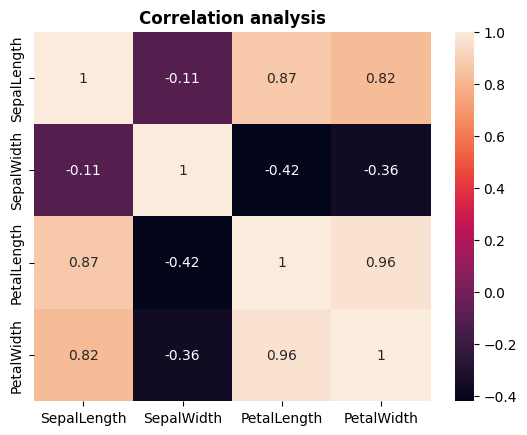

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation analysis",fontweight='bold')

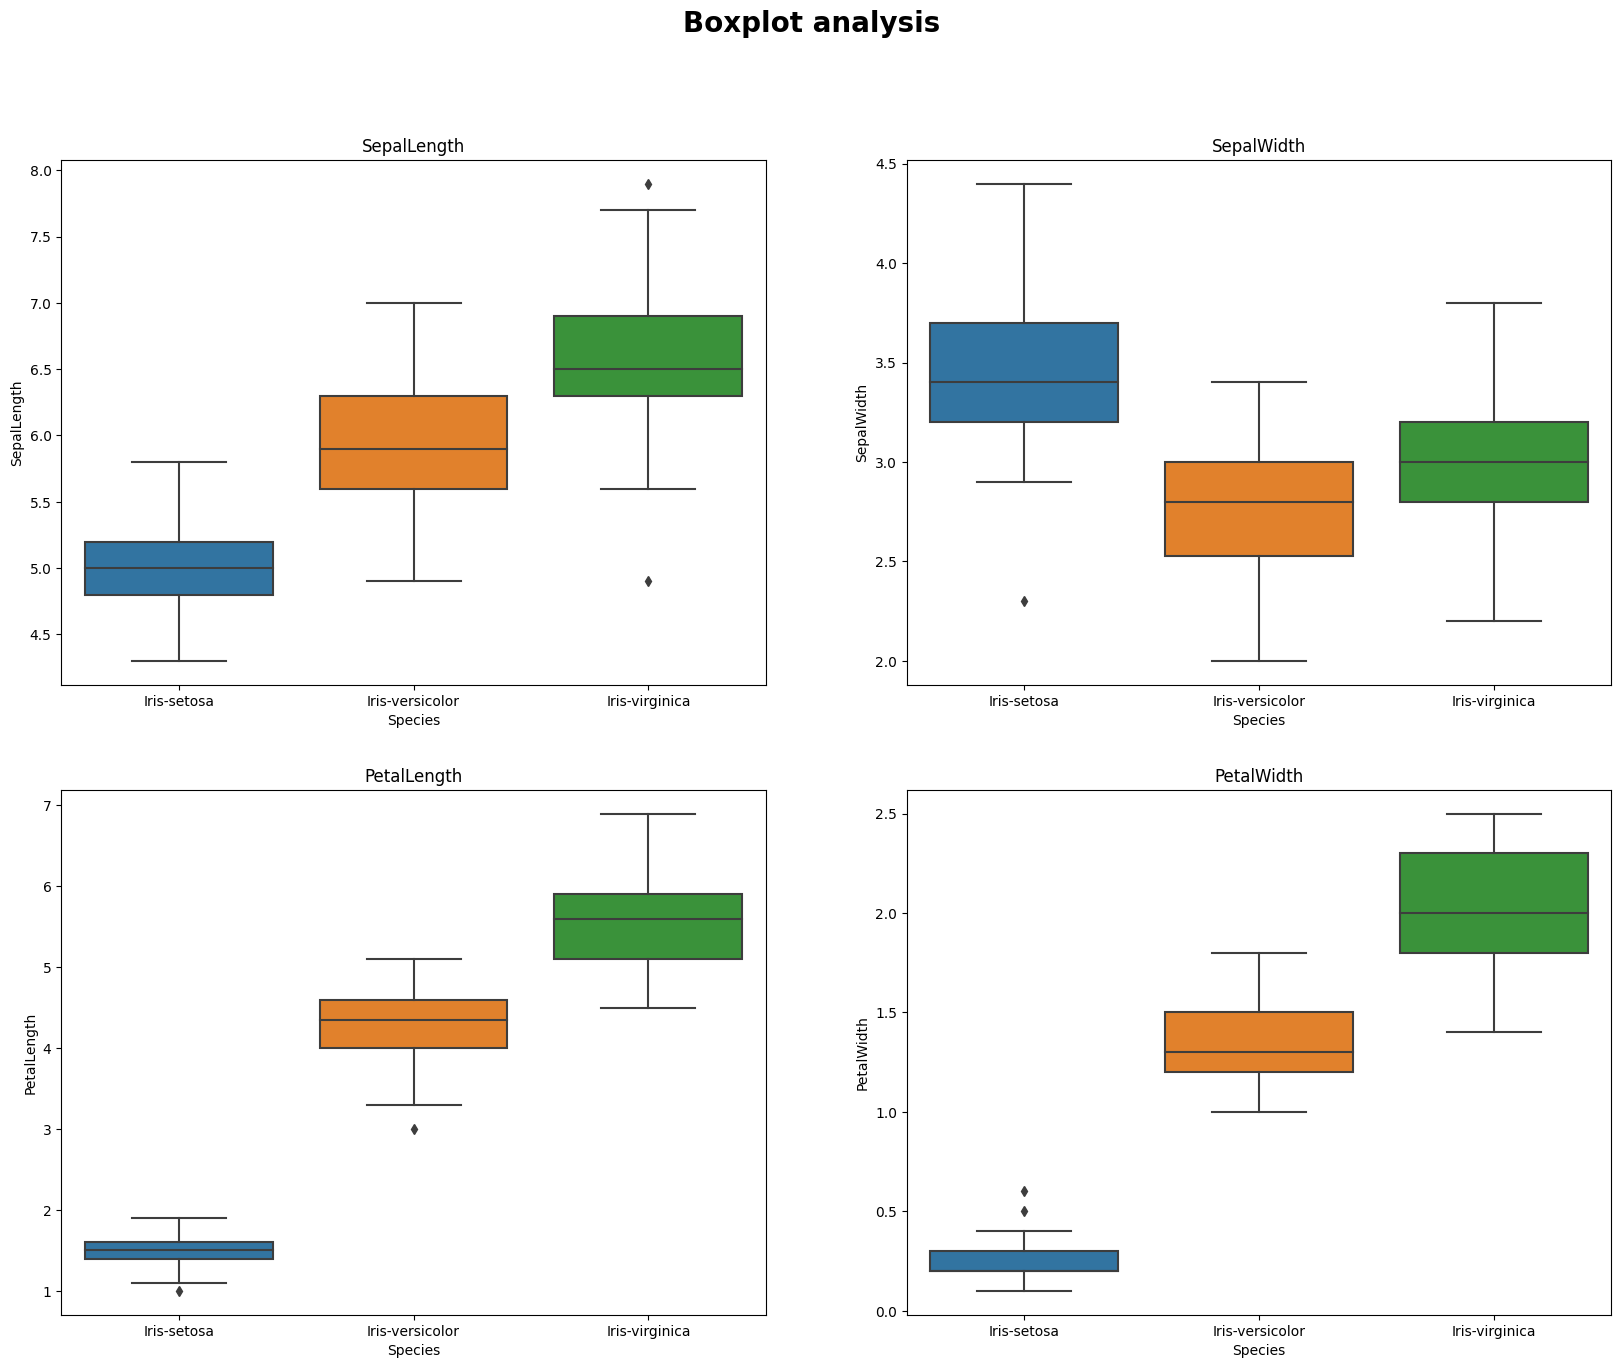

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplot analysis",fontsize=20,fontweight='bold')
for i in range(0,len(df.columns)-1):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='Species',y=df[df.columns[i]],data=df)
    plt.title(df.columns[i])


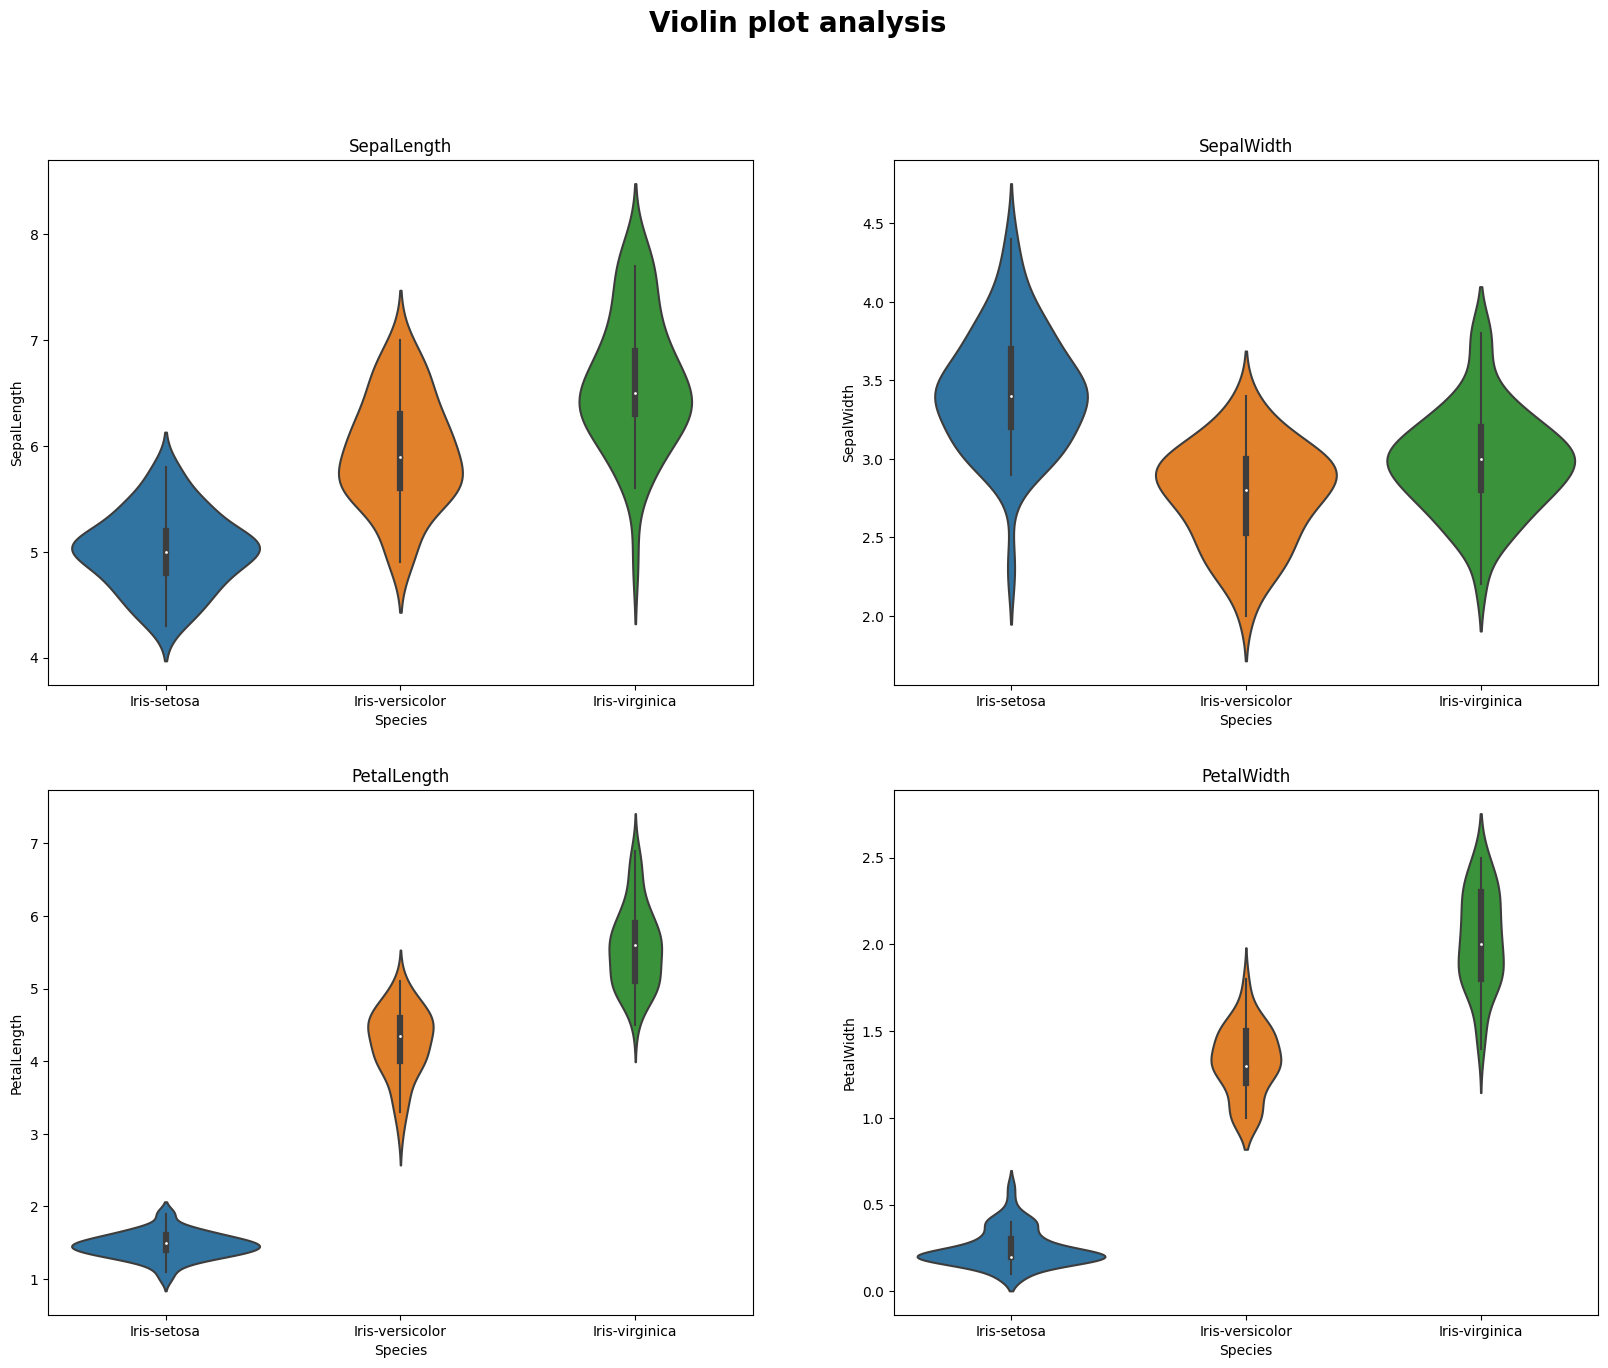

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle("Violin plot analysis",fontsize=20,fontweight='bold')
for i in range(0,len(df.columns)-1):
    plt.subplot(2,2,i+1)
    sns.violinplot(x='Species',y=df[df.columns[i]],data=df)
    plt.title(df.columns[i])


Text(0.5, 0.98, 'Pairplot analysis')

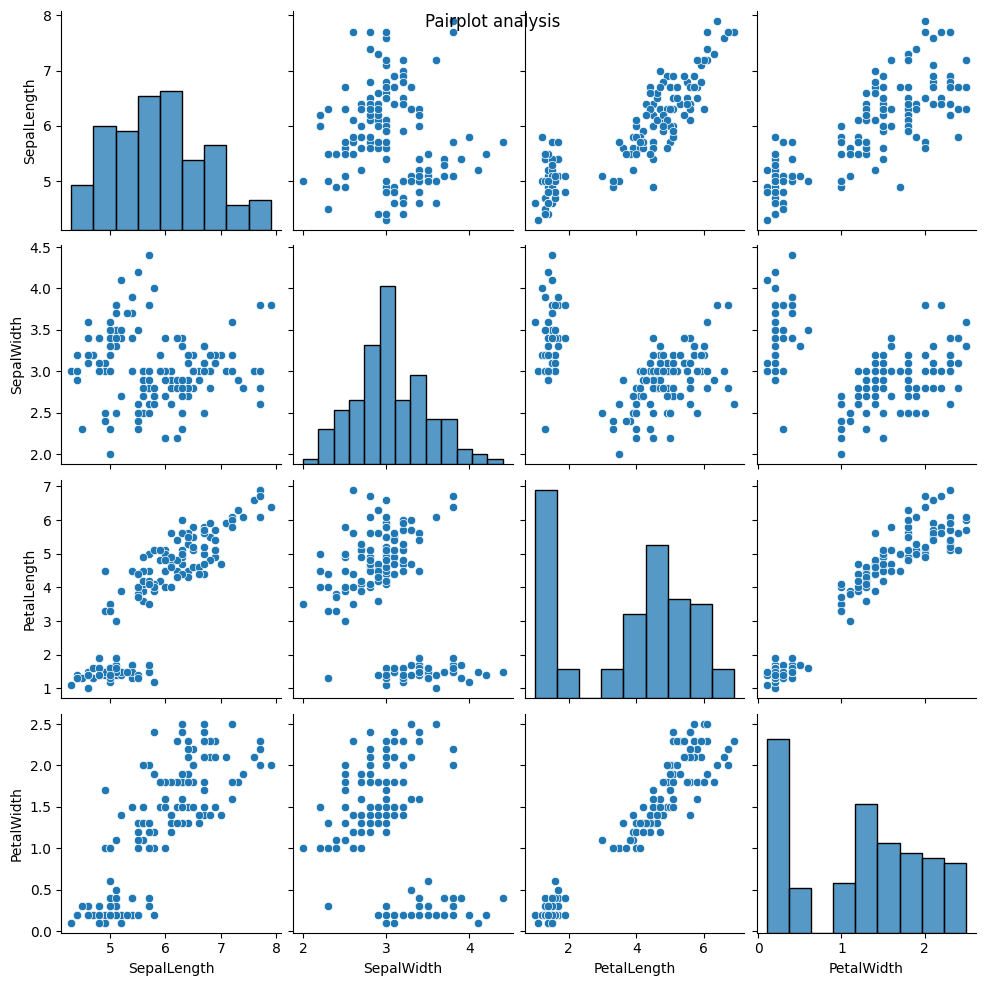

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot analysis")

#Train test split and model building

In [ ]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [ ]:
x=df.drop(columns='Species')
y=df['Species']


In [ ]:
x.head(1)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2


In [ ]:
y.head(1)

0    0
Name: Species, dtype: int64

**Train-Test split**

In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
X_Train.shape

(102, 4)

In [ ]:
X_Test.shape

(45, 4)

#Decision tree classifier

In [ ]:
data=pd.DataFrame()
data[['Max_depth','Accuracy Score']]=range(1,51),None
for i in range(1,51):
  model=DecisionTreeClassifier(max_depth=i,splitter='best',random_state=42)
  model.fit(X_Train,Y_Train)
  DTC_test_pred=model.predict(X_Test)
  data.loc[data['Max_depth'] ==i, 'Accuracy Score'] = (accuracy_score(Y_Test,DTC_test_pred))*100

data

,Max_depth,Accuracy Score
0,1,64.444444
1,2,93.333333
2,3,95.555556
3,4,93.333333
4,5,93.333333
5,6,93.333333
6,7,93.333333
7,8,93.333333
8,9,93.333333
9,10,93.333333


In [ ]:
dtc=DecisionTreeClassifier(max_depth=3,splitter='best',random_state=42)
dtc.fit(X_Train,Y_Train)
DTC_test_pred=dtc.predict(X_Test)
DTC_train_pred=dtc.predict(X_Train)



Accuracy of Testing data data=95.55555555555556


Classification report for Testing data data=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Confusion matrix for Testing data data




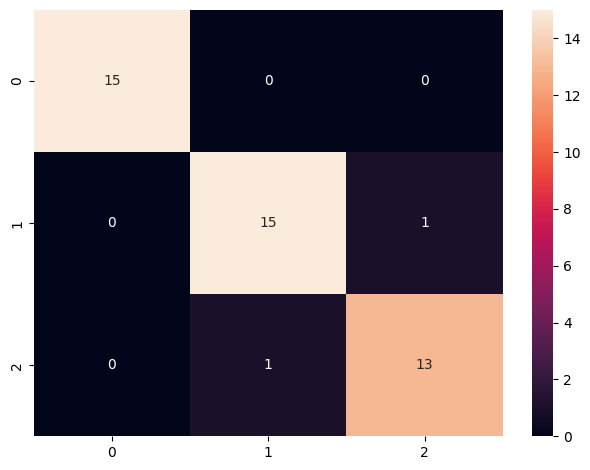

In [ ]:
conc(Y_Test,DTC_test_pred,'Testing data')

Accuracy of Training data data=98.0392156862745


Classification report for Training data data=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.94      0.97        34
           2       0.95      1.00      0.97        35

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



Confusion matrix for Training data data




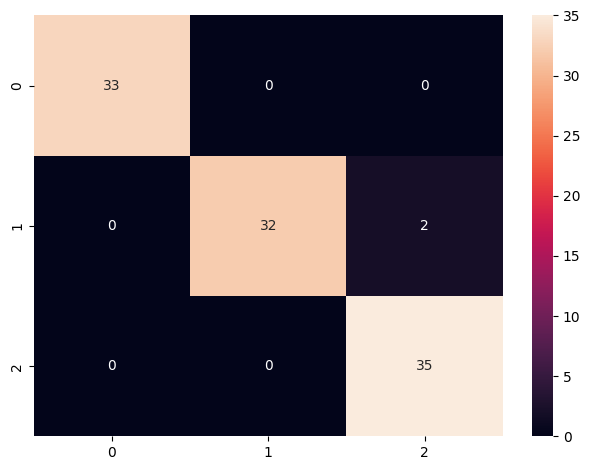

In [ ]:
conc(Y_Train,DTC_train_pred,'Training data')

**In conclusion, we successfully performed Iris Flower Classification using decision tree algorithm. Our results demonstrate a Training Accuracy of 98% and a Test Accuracy of 95%. These findings validate the effectiveness of the chosen approach in accurately predicting the species of Iris flowers.**